In [2]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#lets import the dataset
train=pd.read_csv("bigdatamart_Train.csv")
test=pd.read_csv("bigdatamart_Test.csv")

In [4]:
train["source"]="train"
test["source"]="test"

In [5]:
#lets combine both the datasets
df = pd.concat([train,test],ignore_index=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [6]:
#check for null values
df.isnull().sum()
#There are null values 

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [7]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [8]:
#lets check the number of distinct values in every column
#check only for column with object types
df.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

This tells us that there are 1559 products and 10 outlets/stores.


In [9]:
#Lets chcek the frequency of categorical data
for i in df.columns:
    if df[i].dtype=="object":
        print(df[i].value_counts())
        print('-----------------------------------')
#Here we see there are basically two types of fat low fat and regular so we will convert LF and low fat to Low Fat and reg to Regular

FDF20    10
FDR16    10
NCF42    10
DRG48    10
FDU21    10
         ..
DRN11     7
FDM10     7
FDL50     7
FDI46     7
FDM52     7
Name: Item_Identifier, Length: 1559, dtype: int64
-----------------------------------
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
-----------------------------------
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
-----------------------------------
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045  

In [10]:
#lets replace low fat and LF with Low Fat
#replace reg with Regular
df["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)
df["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)
df["Item_Fat_Content"].replace("reg","Regular",inplace=True)

In [11]:
#now check the value count for Item_Fat_Content column
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [12]:
#lets impute the item weight by mean of item weight groupped by item identifier
item_avg_weight = df.pivot_table(values='Item_Weight', index='Item_Identifier')
missing_values = df['Item_Weight'].isnull()

df.loc[missing_values,'Item_Weight']  = df.loc[missing_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])


In [13]:
 df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [14]:
#Lets impute Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.
outlet_size_modes=df.groupby(["Outlet_Type"]).agg({"Outlet_Size":lambda x: x.value_counts().index[0]})
outlet_size_modes
for index in outlet_size_modes.index:
    null_condition=df.loc[df["Outlet_Type"]==index,["Outlet_Size"]].isnull()
    for index_2 in null_condition.index:
        if null_condition.loc[index_2][0]==True:
            df.loc[index_2,["Outlet_Size"]]=outlet_size_modes.loc[index][0]

In [15]:
#Lets check the null values again
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [16]:
#We noticed that the minimum value here is 0, which makes no practical sense. 
#Lets consider it like missing information and impute it with mean visibility of that product.
visibility_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product
missing_values = (df['Item_Visibility'] == 0)

df.loc[missing_values,'Item_Visibility'] = df.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])

In [17]:
#Lets chcek the updated dataset
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.088380,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,test


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

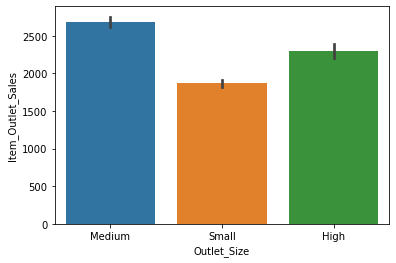

In [18]:
#lets visualize thr relation between outlet_size and sales
sns.barplot( x = "Outlet_Size", y = "Item_Outlet_Sales", data = df)

This will tell us that number of medium size stores are more than small and high size and also they are giving higher sales.

small size stores are less in number and they are giving lower sales.

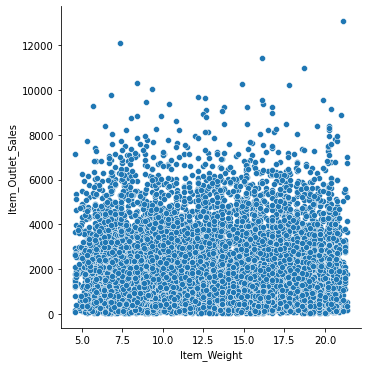

In [19]:
#lets check relation of item weight with sales
sns.relplot(x = "Item_Weight", y = "Item_Outlet_Sales",data = df)

from this plot we can say the sales is not much dependent on weight of the product.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

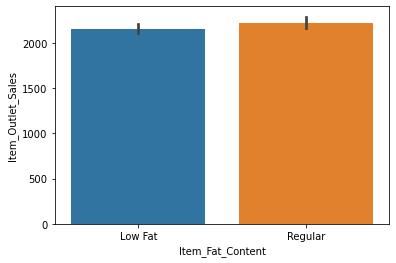

In [20]:
#lets visualize the relation between fat content and sales
sns.barplot( x = "Item_Fat_Content", y = "Item_Outlet_Sales", data = df)

From above visualization we can say, items with Low fat and with regular are nearly giving equal sales.

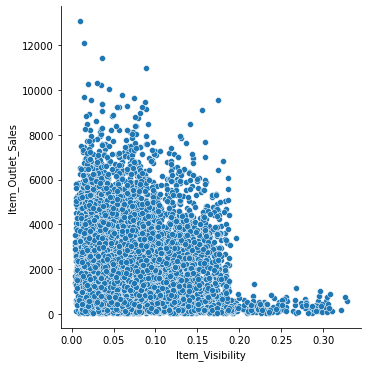

In [21]:
sns.relplot(x = "Item_Visibility", y = "Item_Outlet_Sales",data = df)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

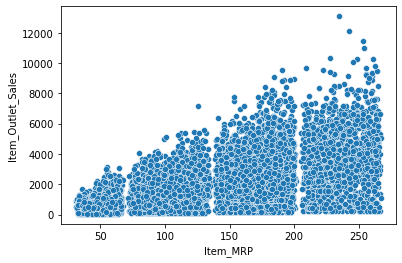

In [22]:
#lets see the relation of MRP with sales
sns.scatterplot(x = "Item_MRP", y = "Item_Outlet_Sales",data = df)

There is very low sales where MRP is below 50, and high sales in MRP 200 to 300

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

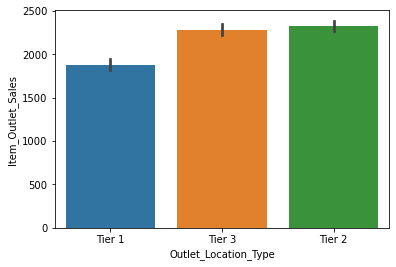

In [23]:
#lets visualize the relation between Outlet_Location_Type and sales
sns.barplot( x = "Outlet_Location_Type", y = "Item_Outlet_Sales", data = df)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

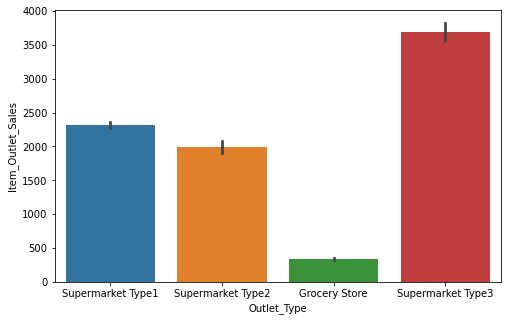

In [24]:
#lets visualize the relation between Outlet_Type and sales
plt.figure(figsize = (8,5))
sns.barplot( x = "Outlet_Type", y = "Item_Outlet_Sales", data = df)

this will tell us the groceries has very less sales compared to others. 

Supermarket Type 3 giving higher sales among all.

In [25]:
#lets use Outlet_Establishment_Year to know how old the store is and make a column Outlet_Years
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df.drop(columns=["Outlet_Establishment_Year"],inplace=True)

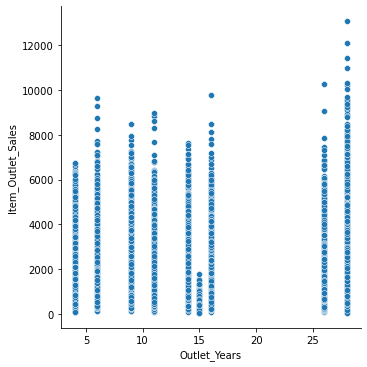

In [26]:
#lets check the data related to outlet year
sns.relplot(x = "Outlet_Years", y = "Item_Outlet_Sales" , data = df )

As per the above plot there is very less sales from the stores established in the year 1998, they may be grocery shops. 

In [27]:
#from Item_Identifier we observe first two letters indicates type of product
#DR = Drinks
#FD = Food
#NC = Non Consumable
item = df["Item_Identifier"].astype(str)   #convert to string
new_item = np.array([i[0:2] for i in item])  #take first letter only as we just want cabin name
new_item = pd.Categorical(new_item)
new_item.describe()

,counts,freqs
categories,,
DR,1317,0.092720
FD,10201,0.718178
NC,2686,0.189102


In [28]:
#by doing this we can drop Item_Type column because it is giving info related to item type 
df["Item_Identifier"] = new_item

In [29]:
#lets check the skewness in continuous data
df.skew()

Item_Weight          0.100417
Item_Visibility      1.257405
Item_MRP             0.130728
Item_Outlet_Sales    1.177531
Outlet_Years         0.396465
dtype: float64

In [30]:
#Lets treat the skewness
for col in df.skew().index:
    if col in df:
        if df.skew().loc[col]>0.5:
            df[col]=np.sqrt(df[col])
        if df.skew().loc[col]<-0.5:
            df[col]=np.cbrt(df[col])

In [31]:
#check the skewness after treating 
df.skew()

Item_Weight          0.100417
Item_Visibility      0.414133
Item_MRP             0.130728
Item_Outlet_Sales    0.234676
Outlet_Years         0.396465
dtype: float64

#### Numerical and One-Hot Coding of Categorical variables

In [32]:
from sklearn.preprocessing import LabelEncoder
leb_enc = LabelEncoder()
#New variable for outlet
df['Outlet'] = leb_enc.fit_transform(df['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Identifier','Outlet_Type','Outlet']
leb_enc = LabelEncoder()
for i in var_mod:
    df[i] = leb_enc.fit_transform(df[i])



In [33]:
#lets drop unwanted columns
df.drop(columns = ["Item_Type","Outlet_Identifier"], inplace = True)


In [34]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Outlet
0,1,9.30,0,0.126678,249.8092,1,0,1,61.115775,train,14,9
1,0,5.92,1,0.138846,48.2692,1,2,2,21.057607,train,4,3
2,1,17.50,0,0.129461,141.6180,1,0,1,45.795961,train,14,9
3,1,19.20,1,0.133545,182.0950,2,2,0,27.062520,train,15,0
4,2,8.93,0,0.098893,53.8614,0,2,1,31.538947,train,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,1,10.50,1,0.116174,141.3154,2,0,1,NaN,test,16,8
14200,1,7.60,1,0.378141,169.1448,1,2,2,NaN,test,4,3
14201,2,10.00,0,0.271162,118.7440,2,1,1,NaN,test,11,7
14202,1,15.30,1,0.297288,214.6218,2,1,1,NaN,test,6,2


In [35]:
#Divide into test and train:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]
test.reset_index(drop=True,inplace=True)

In [36]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Outlet
0,1,9.300,0,0.126678,249.8092,1,0,1,61.115775,train,14,9
1,0,5.920,1,0.138846,48.2692,1,2,2,21.057607,train,4,3
2,1,17.500,0,0.129461,141.6180,1,0,1,45.795961,train,14,9
3,1,19.200,1,0.133545,182.0950,2,2,0,27.062520,train,15,0
4,2,8.930,0,0.098893,53.8614,0,2,1,31.538947,train,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.238293,214.5218,0,2,1,52.710373,train,26,1
8519,1,8.380,1,0.216754,108.1570,2,1,1,23.436830,train,11,7
8520,2,10.600,0,0.187580,85.1224,2,1,1,34.541477,train,9,6
8521,1,7.210,1,0.381078,103.1332,1,2,2,42.960419,train,4,3


In [37]:
#lets drop source column from df
df.drop(columns = ["source"], axis =1, inplace = True)

In [38]:
#Lets drop Item_Outlet_Sales column from test as it is the o/p variable that needs to be predicted
test.drop(columns=["Item_Outlet_Sales"],inplace=True)

In [39]:
#drop source column from train and test
train.drop(columns=["source"],inplace=True)
test.drop(columns=["source"],inplace=True)

In [40]:
#lets split the train data into features and labels 
x = train.drop(columns = "Item_Outlet_Sales", axis = 1)
y = train["Item_Outlet_Sales"]

In [41]:
#Lets bring every column to common scale
scaler = StandardScaler()
X_train = scaler.fit_transform(x)
X_train = pd.DataFrame(X_train,columns=x.columns)
X_test = scaler.fit_transform(test)

In [42]:
X_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Outlet
0,-0.179795,-0.769246,-0.738147,-1.327063,1.747454,-0.664080,-1.369334,-0.252658,-0.139541,1.507813
1,-2.095286,-1.496813,1.354743,-1.194100,-1.489023,-0.664080,1.091569,1.002972,-1.334103,-0.607071
2,-0.179795,0.995858,-0.738147,-1.296655,0.010040,-0.664080,-1.369334,-0.252658,-0.139541,1.507813
3,-0.179795,1.361794,1.354743,-1.252022,0.660050,0.799954,1.091569,-1.508289,-0.020085,-1.664513
4,1.735696,-0.848890,-0.738147,-1.630673,-1.399220,-2.128115,1.091569,-0.252658,1.293934,-1.312032
...,...,...,...,...,...,...,...,...,...,...
8518,-0.179795,-1.293395,-0.738147,-0.107430,1.180783,-2.128115,1.091569,-0.252658,1.293934,-1.312032
8519,-0.179795,-0.967282,1.354743,-0.342783,-0.527301,0.799954,-0.138882,-0.252658,-0.497909,0.802852
8520,1.735696,-0.489412,-0.738147,-0.661575,-0.897208,0.799954,-0.138882,-0.252658,-0.736822,0.450371
8521,-0.179795,-1.219132,1.354743,1.452812,-0.607977,-0.664080,1.091569,1.002972,-1.334103,-0.607071


In [43]:
#to find random stat which gives maximum r2_score
from sklearn.linear_model import LinearRegression
max_r_score=0
r_state = 0
for i in range(150,200):
    x_train, x_test, y_train, y_test = train_test_split(X_train, y,test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.5922252184633574 on Random State 151


In [44]:
#lets split our train data into train and test part
x_train, x_test, y_train, y_test = train_test_split(X_train, y,test_size = 0.25,random_state = 150)

In [45]:
#Model with LinearRegression
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

#evaluation
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test,y_pred)
print("R2 Score :", r2)

RMSE : 12.011533956631938
R2 Score : 0.5922252184633574


In [46]:
#Model with DecesionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)

#evaluation
mse = mean_squared_error(y_test,pred_dt)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test,pred_dt)
print("R2 Score :", r2)

RMSE : 15.172221407077627
R2 Score : 0.3493884626828945


In [47]:
#Model with RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score :", r2)

RMSE : 10.901414336187743
R2 Score : 0.6641161598406714


In [48]:
#Model with KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knr =  KNeighborsRegressor()
knr.fit(x_train, y_train)
pred_knr = knr.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, pred_knr)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test, pred_knr)
print("R2 Score :", r2)

RMSE : 11.464349005296407
R2 Score : 0.6285313099411889


In [49]:
#Lets use SVM regressor
from sklearn.svm import SVR
svr =  KNeighborsRegressor()
svr.fit(x_train, y_train)
pred_svr = knr.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, pred_svr)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test, pred_svr)
print("R2 Score :", r2)

RMSE : 11.464349005296407
R2 Score : 0.6285313099411889


## Cross validation

In [50]:
from sklearn.model_selection import KFold, cross_val_score
k_f =KFold(n_splits = 3, shuffle = True)
k_f
#for  LinearRegression model
reg = LinearRegression()
c_scores = cross_val_score(reg,X_train,y,cv=5)
print("Cross validation score of LinearRegression model is :", c_scores.mean())

Cross validation score of LinearRegression model is : 0.5579581561267254


In [51]:
#for DecesionTreeRegressor model
dt =DecisionTreeRegressor()
c_scores = cross_val_score(dt,X_train,y,cv=5)
print("Cross validation score of DecisionTreeRegressor model is :", c_scores.mean())

Cross validation score of DecisionTreeRegressor model is : 0.34069521500007294


In [52]:
#for RandomForestRegressor model
c_scores = cross_val_score(rf,X_train,y,cv=5)
print("Cross validation score of RandomForestRegressor model is :", c_scores.mean())

Cross validation score of RandomForestRegressor model is : 0.6335139594211701


In [53]:
#for KNeighborsRegressor model
c_scores = cross_val_score(knr,X_train,y,cv=5)
print("Cross validation score of KNeighborsRegressor model is :", c_scores.mean())

Cross validation score of KNeighborsRegressor model is : 0.6010967040207099


In [54]:
#for SVR model
c_scores = cross_val_score(svr,X_train,y,cv=5)
print("Cross validation score of SVR model is :", c_scores.mean())

Cross validation score of SVR model is : 0.6010967040207099


All the algorithms are deffering with 3% after cross validation , we will select a model giving more accuracy with least root meen square error. which is RandomForestRegressor

## Hyperparameter Tunning

In [55]:
grid_params = {
                'max_depth': [2,5,6,9,10],
                'n_estimators':[200,500,700,900],
                'min_samples_leaf': [1, 2, 4, 5],
                'max_features':['aoto','sqrt','log2'],
                'bootstrap': [True, False]
                }

In [56]:
GCV =  GridSearchCV(RandomForestRegressor(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 5, 6, 9, 10],
                         'max_features': ['aoto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'n_estimators': [200, 500, 700, 900]})

In [57]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'n_estimators': 500}

In [59]:
#Let's train and test our model using best parameters
model = RandomForestRegressor(max_depth=10, n_estimators=500, bootstrap=True, max_features= 'sqrt',min_samples_leaf=4)

model.fit(x_train,y_train)
pred = model.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f"r2 Score: {r2_score(y_test,pred)*100}%")
print("---------------------------------------------------")
print("RMSE :", rmse)

r2 Score: 69.52479780530928%
---------------------------------------------------
RMSE : 10.38392611639841


In [60]:
#lets predict the sales with our best model
pred = model.predict(X_test)

In [61]:
#Lets create dataframe with test data
X_test = pd.DataFrame(X_test,columns=test.columns)

In [62]:
#lets make the dataframe for prediction
pred = pd.DataFrame(pred, columns=["Item_Outlet_sales"])

In [63]:
#lets transform test bata into dataframe
X_test["Item_Outlet_sales"] = pred

In [64]:
X_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Outlet,Item_Outlet_sales
0,-0.191873,1.734064,-0.740811,-1.766750,-0.536555,-0.664166,-1.369215,-0.252769,-0.139891,1.507689,38.594591
1,-0.191873,-0.938845,1.349873,-0.564629,-0.868937,0.799989,-0.138827,-0.252769,-1.095512,-0.959749,37.434764
2,1.723819,0.413711,-0.740811,0.752920,1.629848,0.799989,1.091560,-1.507994,-0.020438,-1.664731,23.181154
3,-0.191873,-1.150316,-0.740811,-1.358077,0.226697,0.799989,-0.138827,-0.252769,-1.095512,-0.959749,49.880407
4,-0.191873,0.199020,1.349873,1.070692,1.508110,-0.664166,1.091560,2.257683,1.532446,0.097725,73.796563
...,...,...,...,...,...,...,...,...,...,...,...
5676,-0.191873,-0.466524,1.349873,-1.444892,0.004727,0.799989,-1.369215,-0.252769,0.099015,1.155198,45.607194
5677,-0.191873,-1.089129,1.349873,1.442823,0.455014,-0.664166,1.091560,1.002457,-1.334417,-0.607258,49.007046
5678,1.723819,-0.573870,-0.740811,0.263562,-0.360485,0.799989,-0.138827,-0.252769,-0.498248,0.802707,41.554330
5679,-0.191873,0.563996,1.349873,0.551558,1.190844,0.799989,-0.138827,-0.252769,-1.095512,-0.959749,60.477729


# Saving the model

In [65]:
import joblib
joblib.dump(model,"BigMart_prediction.pkl")

['BigMart_prediction.pkl']